# I.Capstone II Porject
Prepared by Jeffrey Aroun bin Omar
<br>
DataScience Job connecter JCDSOL-009

### II.Start - 21st.March.2022
- Data: [TSA_claims_Datasets](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database)
- Title: TSA Claims Database

### II.I Background 
This dataset looks into claims filed against the Transportation Security Administration (TSA), which is responsible for providing security for the traveling public in the United States. The TSA was created in response to the September 11, 2001 terrorist attacks, with the goal of preventing similar attacks from occurring in the future. The agency is mainly responsible for screening passengers and their baggage, as well as overseeing security measures in airports and on airplanes.

We will be exploring and analyzing the dataset using the techniques taught by Purwadhika. Also to provide possible recommendations for better service and performance.



### III.Tools 
We will be importing the following python libraries:
- Pandas: To build our dataframes
- Matplotlib: To Chart and provide visual aids to see our data. 
- numpy:  To perform mathematical operations and array manipulations on our data.
- Seaborn: To create more complex and visually appealing charts and graphs than are available with Matplotlib alone.

#### III.I Jupyter 
We will be using jupyter notebook programed in visual studio code to explore and do some hypothesis testing which we can than later use in our story board using Tableau.

#### III.II Tableau 
Will be used for the video presenation.  



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<center><font size="6">&uarr;&uarr;&uarr;</font></center>
The "as" keyword is used to shorten the library names, which will not only save us keystrokes but also help prevent errors and boost coding speed.

##### Note:

> The short names used are conventional names used associated with the library names for others to better comprehend what we will be doing. 

In [2]:
# Initialize database by referencing it as df
df = pd.read_csv('tsa_claims.csv')


C:\Users\User\AppData\Local\Temp\ipykernel_24892\2710935273.py:2: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv')


## 1. Exploring the Data
First lets just get some general information regarding our dataset.
- How many rows
- How many columns and their names
- Date range
- what are the unique values for each column
- Are there any missing values
- Than we'll move to Data descriptives
<br>

From there we will consider cleaning the data and compare the uncleaned data descriptives vs the clean one. 

### df.info() - Part 1
We'll start by getting some general information on the dataframe. 
<br>
<br>
This tells us:-

- How many rows we have 
- How many columns we have
- Do we have missing values

In [18]:
# Num. of rows
display(df.info(), df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204270 entries, 0 to 204269
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


None

Claim Number         3
Date Received      266
Incident Date     2186
Airport Code      8527
Airport Name      8527
Airline Name     34377
Claim Type        7916
Claim Site         743
Item              3969
Claim Amount      4046
Status               8
Close Amount     68955
Disposition      72911
dtype: int64

### df.info() - Part 2
From the output we can see:
- there are missing values.
> we'll need to investigate this either to fill out the rest or eliminate them. 
- There are 204267 rows in total
- And 13 columns

<br>

we'll proceed to print out the head and tail the first and last 5 rows. Just so we can see how the table looks like. 


In [4]:
display(df.head(3),df.tail(3))

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204267,2016010000000.0,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204268,2016010000000.0,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204269,2015120000000.0,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


### General findings & Prospective exploration
We can see that earliest claim started in Jan 2002 until Dec 2015. 
<br>
<br>
But key data missing that could improve the quality of our analysis is:

<br>
We have alot of missing values in our columns we'll start by analyzing the porpotion for each column.

In [5]:
df.isna().sum()/df.shape[0]*100

Claim Number      0.001469
Date Received     0.130220
Incident Date     1.070152
Airport Code      4.174377
Airport Name      4.174377
Airline Name     16.829197
Claim Type        3.875263
Claim Site        0.363734
Item              1.943017
Claim Amount      1.980712
Status            0.003916
Close Amount     33.756792
Disposition      35.693445
dtype: float64

In [19]:
df['Item'].value_counts()

Other                                                                                                                                                                                                                                                                                                                                                            36908
Luggage (all types including footlockers)                                                                                                                                                                                                                                                                                                                        19128
Clothing - Shoes; belts; accessories; etc.                                                                                                                                                                                                                                                

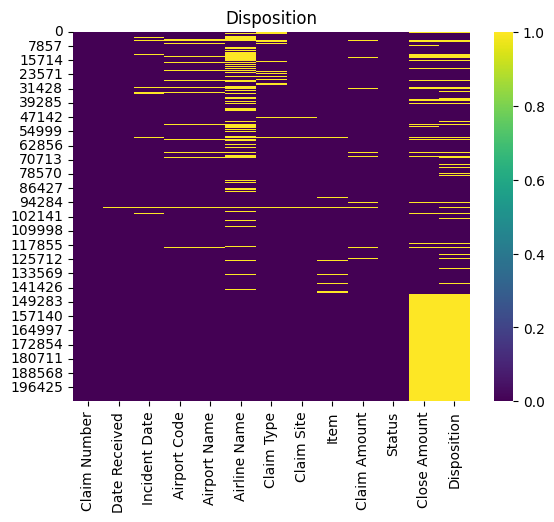

In [7]:
columns = []
for col in df.columns:
    columns.append(col)    
sns.heatmap(df[columns].isnull(), cmap='viridis')
plt.title(col)
plt.show()

In [20]:
df['Claim Type'].value_counts()

Passenger Property Loss    117868
Property Damage             75364
Personal Injury              1465
Employee Loss (MPCECA)        485
Passenger Theft               465
Motor Vehicle                 369
-                             282
Complaint                      48
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [9]:
len(df['Item'])

204270

In [10]:
compliant_df = df.loc[df['Claim Type'] == 'Property Damage'].reset_index()
compliant_df.head(50)

,index,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,4,2.00503E+12,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
5,8,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
6,11,2.00507E+12,7-Jul-02,6/17/2005 0:00,CLT,Charlotte/Douglas International Airport,AirTran Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$43.49,Approved,$43.49,Approve in Full
7,19,0714534M,22-Jul-02,3/6/2002 0:00,NaN,NaN,Northwest Airlines,Property Damage,Other,Photographic Film,$68.00,Denied,$0.00,Deny
8,25,0702564M,19-Aug-02,6/22/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,America West,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),$354.93,Settled,$301.69,Settle
9,28,15352,21-Aug-02,7/13/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Continental Airlines,Property Damage,Other,Luggage (all types including footlockers),$40.00,Canceled,NaN,NaN
